In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [8]:
data = load_breast_cancer()
description = data.DESCR.split('\n')
print('\n'.join(description[11:31]))

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - class:
            - WDBC-Malignant
            - WDBC-Benign


In [9]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.shape

(569, 31)

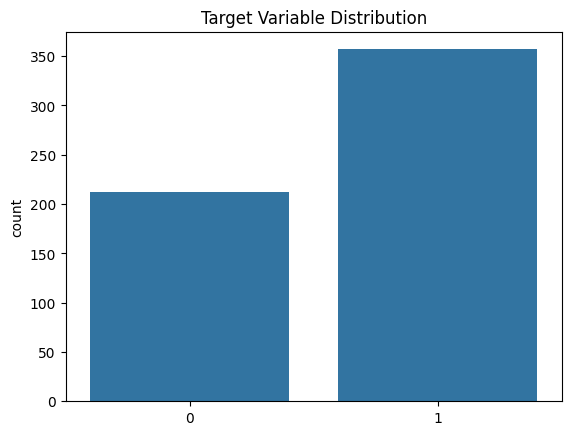

In [10]:
sns.countplot(x='target', data=df)
plt.title('Target Variable Distribution')
plt.xlabel('')
plt.show()

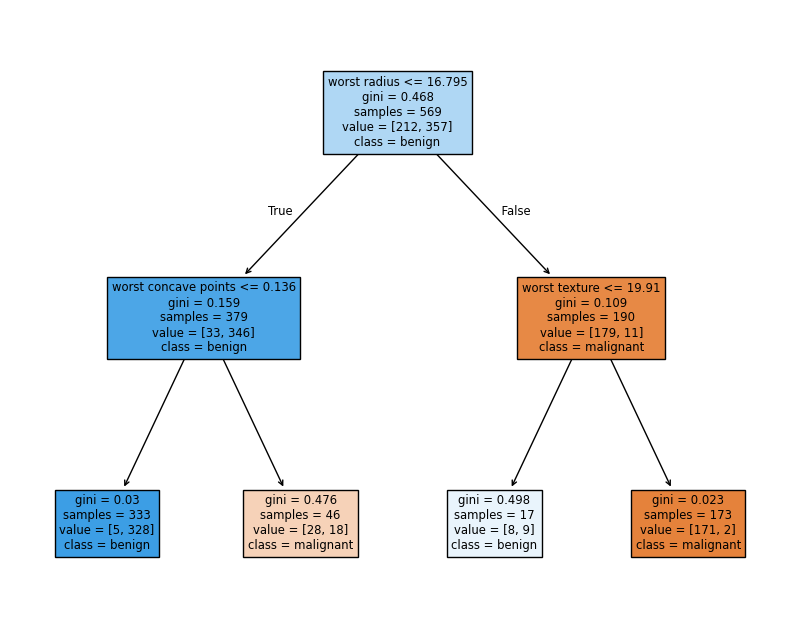

In [11]:
clf = DecisionTreeClassifier(max_depth=2)
x = data.data
y = data.target
clf.fit(x, y)
plt.figure(figsize=(10,8))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

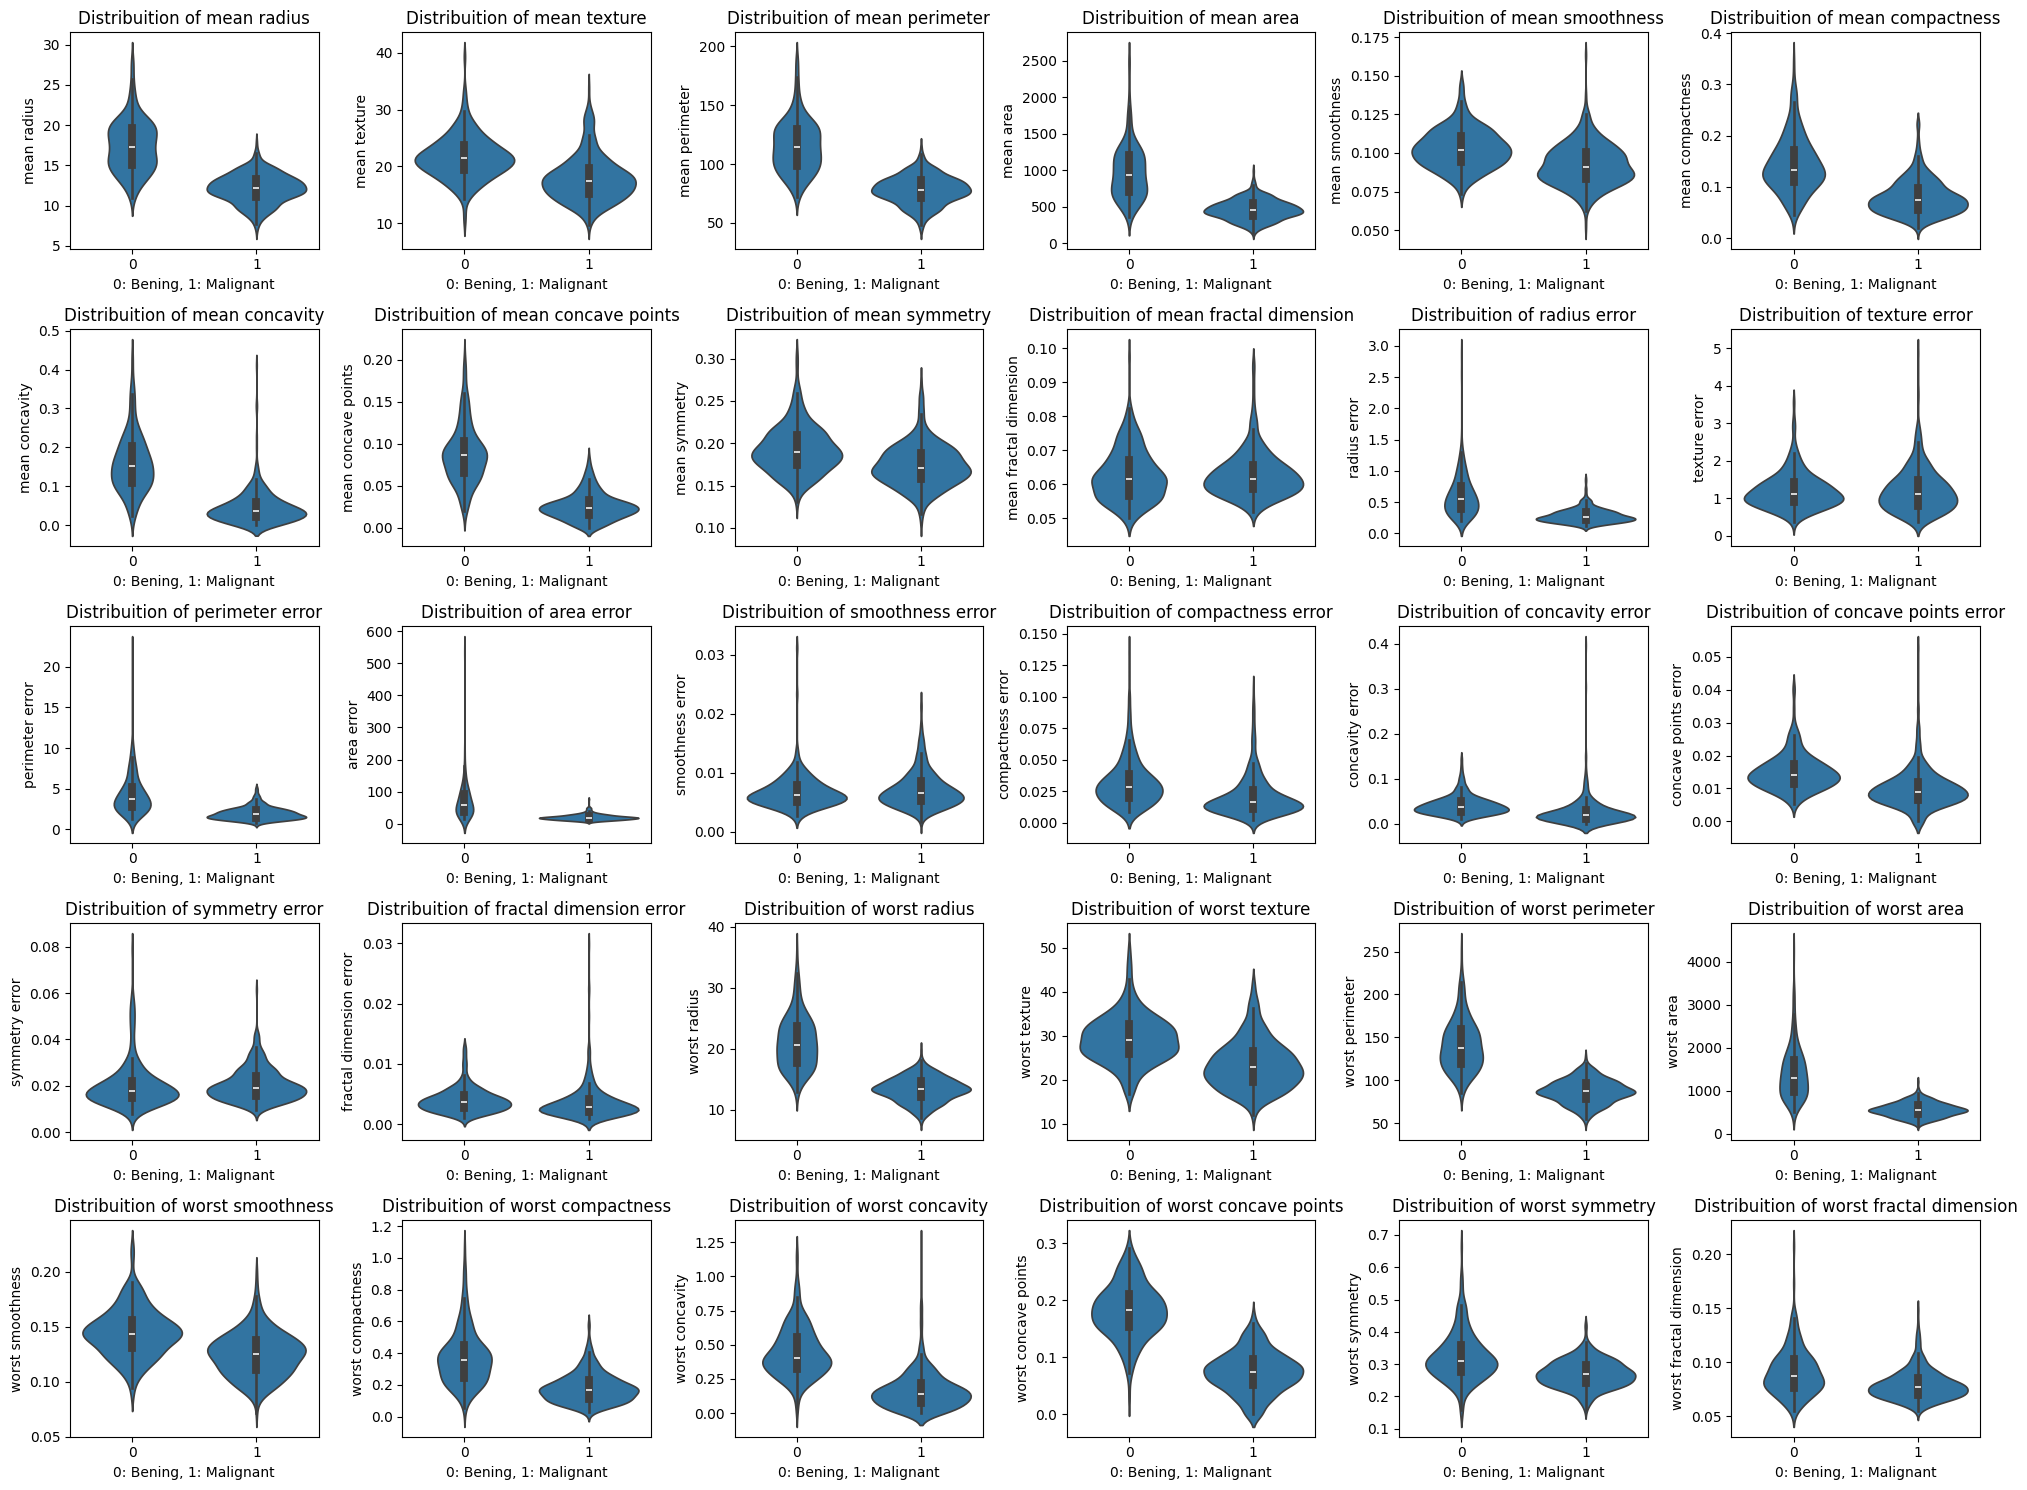

In [12]:
features = df.columns[:-1]
fid, axs = plt.subplots(nrows=5, ncols=6, figsize=(20,15))
axs = axs.flatten()
for i, feature in enumerate(features):
    sns.violinplot(x='target', y=feature, data=df, split=False, ax=axs[i])
    axs[i].set_title(f'Distribuition of {feature}')
    axs[i].set_xlabel('0: Bening, 1: Malignant')
    axs[i].set_ylabel(feature)

for i in range(len(features), len(axs)):
    axs[i].remove()

plt.tight_layout()
plt.show()

In [14]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])